## AIML Module Project - CNN - Project 1

### TASK1: PROJECT OBJECTIVE: University’s management require an automation which can create a classifier capable of determining a plant's species from a photo

Steps and tasks: 
1. Import the data. Analyse the dimensions of the data. Visualise the data.
2. Train tune and test AIML image classifier model using:
    • Use supervised learning algorithms for training
    • Use neural networks for training
    • Use CNN for training
3. Compare the results from the above step along with your detailed observations.
4. Pickle the best performing model.
5. Import the the image in the “ Prediction” folder to predict the class.Display the image. Use the best trained image classifier model to predict the class.

---



In [1]:
#Import libraries
import os
%matplotlib inline
import matplotlib.pyplot as plt # Data Visualization
import pandas as pd # Data processing
import seaborn as sns # Data Visualization
import numpy as np # Linear Algebra
import tensorflow as tf #Tensor Flow
from sklearn import preprocessing #preprocessing libraries from sklearn

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")



In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
os.chdir('/gdrive/MyDrive/Colab Notebooks/CNN Project')

#### 1. Import the data. Analyse the dimensions of the data. Visualise the data.

In [4]:
#from zipfile import ZipFile
#with ZipFile('/gdrive/MyDrive/Colab Notebooks/CNN Project/Dataset - Plant-seedlings-classification.zip','r') as z:
#  z.extractall()

In [5]:
!ls -ltr '/gdrive/MyDrive/Colab Notebooks/CNN Project/train'

total 48
drwx------ 2 root root 4096 Mar 25 19:01  Black-grass
drwx------ 2 root root 4096 Mar 25 19:01  Charlock
drwx------ 2 root root 4096 Mar 25 19:01  Cleavers
drwx------ 2 root root 4096 Mar 25 19:01 'Common Chickweed'
drwx------ 2 root root 4096 Mar 25 19:01 'Common wheat'
drwx------ 2 root root 4096 Mar 25 19:01 'Fat Hen'
drwx------ 2 root root 4096 Mar 25 19:01 'Loose Silky-bent'
drwx------ 2 root root 4096 Mar 25 19:02  Maize
drwx------ 2 root root 4096 Mar 25 19:02 'Scentless Mayweed'
drwx------ 2 root root 4096 Mar 25 19:02 'Shepherds Purse'
drwx------ 2 root root 4096 Mar 25 19:02 'Small-flowered Cranesbill'
drwx------ 2 root root 4096 Mar 25 19:02 'Sugar beet'


There are images for 12 groups/classes of plant seeds in train data set

In [6]:
train_path = '/gdrive/MyDrive/Colab Notebooks/CNN Project/train'
classes = {}
for class_name in os.listdir(train_path):
    classes[class_name] = len(os.listdir(os.path.join(train_path, class_name)))
Class_df = pd.DataFrame(classes,index=['Img_Count',]).T

In [7]:
Class_df.T

,Black-grass,Charlock,Cleavers,Common Chickweed,Common wheat,Fat Hen,Loose Silky-bent,Maize,Scentless Mayweed,Shepherds Purse,Small-flowered Cranesbill,Sugar beet
Img_Count,263,390,287,611,221,475,654,221,516,231,496,385


Total Train Images: 4750


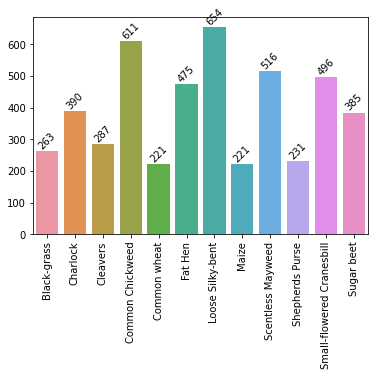

In [8]:
print('Total Train Images:', Class_df['Img_Count'].sum())
splot = sns.barplot(Class_df['Img_Count'].index, Class_df['Img_Count'].values)
splot.set_xticklabels(Class_df['Img_Count'].index, rotation=90)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', rotation=45, xytext = (0, 10), textcoords = 'offset points')


In [9]:
test_path = '/gdrive/MyDrive/Colab Notebooks/CNN Project/test'
print('Total Test Images :' ,len(os.listdir(test_path)))

Total Test Images : 795


In [10]:
!ls -ltr '/gdrive/MyDrive/Colab Notebooks/CNN Project/test' | head -5 # list sample test images

total 88522
-rw------- 1 root root  92873 Mar 25 19:01 060f1dc84.png
-rw------- 1 root root 100800 Mar 25 19:01 060450d79.png
-rw------- 1 root root 140448 Mar 25 19:01 05341a8a6.png
-rw------- 1 root root  75341 Mar 25 19:01 04814f36d.png


In [11]:
!ls -ltr '/gdrive/MyDrive/Colab Notebooks/CNN Project/train/Black-grass' | head -5 # list sample train images

total 264211
-rw------- 1 root root   558075 Mar 25 19:01 1276dffba.png
-rw------- 1 root root   816865 Mar 25 19:01 0fe440ed5.png
-rw------- 1 root root  1412737 Mar 25 19:01 0e91f92a1.png
-rw------- 1 root root   183911 Mar 25 19:01 0dad57e7f.png


In [12]:
import cv2
img1 = cv2.imread('/gdrive/MyDrive/Colab Notebooks/CNN Project/train/Black-grass/082314602.png')
img2 = cv2.imread('/gdrive/MyDrive/Colab Notebooks/CNN Project/train/Black-grass/078eae073.png')
img3 = cv2.imread('/gdrive/MyDrive/Colab Notebooks/CNN Project/test/099b961ec.png')
img4 = cv2.imread('/gdrive/MyDrive/Colab Notebooks/CNN Project/test/08d591441.png')
print('Train Image size and channel: ', img1.shape)
print('Train Image size and channel: ', img2.shape)
print('Test Image size and channel: ', img3.shape)
print('Test Image size and channel: ', img4.shape)

Train Image size and channel:  (251, 251, 3)
Train Image size and channel:  (1074, 1074, 3)
Test Image size and channel:  (298, 298, 3)
Test Image size and channel:  (317, 317, 3)


* Image attributes are not consistent

In [13]:
#Generate batches of tensor image data with real-time data augmentation.
#Also creating a validation dataset

def Datagen(batch_size):
  train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                                shear_range=0.2,
                                                                zoom_range=0.2,
                                                                horizontal_flip=True,
                                                                validation_split=0.2) # set validation split

# we fixed the image size to 150 x 150 #256 was consuming too much of memory resource
  img_height=img_width = 150
  training_generator = train_datagen.flow_from_directory(
      train_path,
      target_size=(img_height, img_width),
      batch_size=batch_size,
      class_mode='categorical',
      subset='training') # set as training data

  validation_generator = train_datagen.flow_from_directory(
      train_path, # same directory as training data
      target_size=(img_height, img_width),
      batch_size=batch_size,
      class_mode='categorical',
      subset='validation') # set as validation data
  return training_generator,validation_generator

In [14]:
traingen,validgen = Datagen(32) #batch_size =32

Found 3803 images belonging to 12 classes.
Found 947 images belonging to 12 classes.


 Resized image size and channel :  150 x 150 x 3


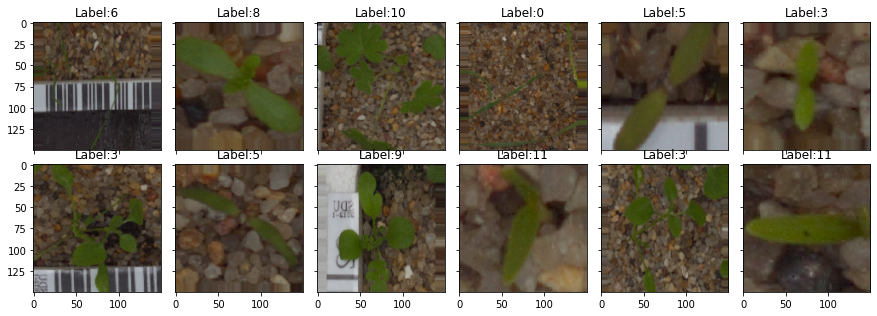

In [15]:
# Verify the images are loaded properly
from mpl_toolkits.axes_grid1 import ImageGrid
x,y=next(traingen)
nrows=2
ncols=6
figsize=(15,15)
fig = plt.figure(None, figsize,frameon=False)
grid = ImageGrid(fig,111,nrows_ncols=(nrows, ncols),axes_pad=0.2,share_all=True,)
for i in range(nrows*ncols):
  ax = grid[i]
  ax.imshow(x[i],cmap='Greys_r')
  lbl = "Label:"+ str(np.argmax(y[i]))
  ax.set_title(lbl)
print(" Resized image size and channel : ", x.shape[1] ,"x", x.shape[2] ,"x", x.shape[3])

Image Size = 150 x 150.
Channel = 3 (RGB being color image

#### Creating Training and Validation dataset for model

In [16]:
X_train, y_train = next(traingen) #Creating instance1 of 32 batch size
X_test, y_test = next(validgen)

In [17]:
print('Shape of X_train:', X_train.shape, '\n', X_train[0])
print('\nShape of y_train:', y_train.shape, '\n', y_train[0])

Shape of X_train: (32, 150, 150, 3) 
 [[[0.18431373 0.15048419 0.14656262]
  [0.18431373 0.15046228 0.14654072]
  [0.18431373 0.15044038 0.14651881]
  ...
  [0.43813288 0.36754465 0.26774952]
  [0.43814382 0.3675556  0.26773858]
  [0.4381548  0.36756653 0.2677276 ]]

 [[0.18494366 0.14446813 0.14117648]
  [0.1849546  0.14445718 0.14117648]
  [0.18496555 0.14444622 0.14117648]
  ...
  [0.4235347  0.35742673 0.25994626]
  [0.423458   0.357372   0.25991338]
  [0.42338136 0.3573172  0.25988054]]

 [[0.18820396 0.14114514 0.14117648]
  [0.18819301 0.14113419 0.14117648]
  [0.18818207 0.14112324 0.14117648]
  ...
  [0.380575   0.30633897 0.22042914]
  [0.3803669  0.30605417 0.22019911]
  [0.38015878 0.30576935 0.21996906]]

 ...

 [[0.19461378 0.15883143 0.1509883 ]
  [0.19464664 0.15887526 0.15103212]
  [0.19467951 0.15891907 0.15107593]
  ...
  [0.24705884 0.17367105 0.11764707]
  [0.24705884 0.17368199 0.11764707]
  [0.24705884 0.17369294 0.11764707]]

 [[0.18757413 0.15228002 0.14727165]

In [18]:
# Store the data in X_train, y_train variables by iterating over the batches
from tqdm import tqdm
batch_size = 32
traingen.reset()
X_train, y_train = next(traingen)
for i in tqdm(range(int(3803/batch_size)-1)): #1st batch is alread fetched before the for loop
  img, label = next(traingen)
  X_train = np.append(X_train, img, axis=0 )
  y_train = np.append(y_train, label, axis=0)
print(X_train.shape, y_train.shape)

100%|██████████| 117/117 [18:57<00:00,  9.72s/it]

(3776, 150, 150, 3) (3776, 12)


In [19]:
print('Shape of X_train:', X_train.shape, '\n', X_train[0])
print('\nShape of y_train:', y_train.shape, '\n', y_train[0])

Shape of X_train: (3776, 150, 150, 3) 
 [[[0.19954073 0.1612436  0.15248191]
  [0.22013432 0.17209487 0.17020704]
  [0.24505734 0.20036373 0.19703451]
  ...
  [0.3967781  0.39279586 0.41094553]
  [0.61291903 0.6260653  0.6603114 ]
  [0.6168134  0.63679695 0.6713397 ]]

 [[0.19667572 0.164905   0.15001509]
  [0.22553214 0.18468168 0.17902035]
  [0.26052397 0.21435383 0.21015261]
  ...
  [0.45524275 0.4583554  0.47234157]
  [0.62066793 0.6304607  0.66849244]
  [0.63211477 0.6484369  0.683731  ]]

 [[0.20765989 0.16856636 0.168322  ]
  [0.2304593  0.19440006 0.19429876]
  [0.2581114  0.21622702 0.20657624]
  ...
  [0.49120027 0.4912103  0.5113531 ]
  [0.62224656 0.63393027 0.669965  ]
  [0.63529414 0.6509804  0.6862745 ]]

 ...

 [[0.22389081 0.16756119 0.1729104 ]
  [0.22152151 0.17229114 0.16376872]
  [0.2296078  0.18334022 0.18644866]
  ...
  [0.40035582 0.24988139 0.12298986]
  [0.39313    0.23991461 0.10182371]
  [0.38609177 0.24040104 0.08176028]]

 [[0.23370749 0.17254902 0.1838945

In [20]:
#Now for validation data set: Store the data in X_test, y_test variables by iterating over the batches
validgen.reset()
X_test, y_test = next(validgen)
for i in tqdm(range(int(960/batch_size)-1)): #1st batch is alread fetched before the for loop
  img, label = next(validgen)
  X_test = np.append(X_test, img, axis=0 )
  y_test = np.append(y_test, label, axis=0)
print(X_test.shape, y_test.shape)

100%|██████████| 29/29 [04:30<00:00,  9.34s/it]

(947, 150, 150, 3) (947, 12)


In [21]:
traingen.class_indices

{'Black-grass': 0,
 'Charlock': 1,
 'Cleavers': 2,
 'Common Chickweed': 3,
 'Common wheat': 4,
 'Fat Hen': 5,
 'Loose Silky-bent': 6,
 'Maize': 7,
 'Scentless Mayweed': 8,
 'Shepherds Purse': 9,
 'Small-flowered Cranesbill': 10,
 'Sugar beet': 11}

#### 2. Train tune and test AIML image classifier model using: • Use supervised learning algorithms for training • Use neural networks for training • Use CNN for training

In [22]:
# Training and Validation data processing for ML algorithm
X_train_ML = []
for i in range(X_train.shape[0]):
  X_train_ML.append(X_train[i,:].flatten())

# Testing data
X_test_ML = []
for i in range(X_test.shape[0]):
  X_test_ML.append(X_test[i,:].flatten())

X_train_ML= np.stack(X_train_ML)
X_test_ML= np.stack(X_test_ML)

y_train_enc = np.argmax(y_train,axis=1)
y_test_enc = np.argmax(y_test,axis=1)

In [23]:
# Use ML technique to build a classifier 
# Preprocess the data - Split the data into train, validation and test 
# RANDOM FOREST

# Library
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Model
model_rf = RandomForestClassifier(n_estimators=100,
                                    criterion='gini',
                                    max_depth=None,
                                    min_samples_split=2,
                                    min_samples_leaf=1,
                                    min_weight_fraction_leaf=0.0,
                                    max_features='auto',
                                    max_leaf_nodes=None,
                                    min_impurity_decrease=0.0,
                                    min_impurity_split=None,
                                    bootstrap=False,
                                    oob_score=False,
                                    n_jobs=None,
                                    random_state=None,
                                    verbose=0,
                                    warm_start=False,
                                    class_weight=None,
                                    ccp_alpha=0.0,
                                    max_samples=None,)

In [24]:
model_rf.fit(X_train_ML,y_train_enc)
pred_rf = model_rf.predict(X_test_ML)
print("Accuracy Score with Random Forest Model for classification: %.2f" %(accuracy_score(y_test_enc, pred_rf)*100))


Accuracy Score with Random Forest Model for classification: 52.16


In [25]:
### Define NNL model

import tensorflow as tf
from tensorflow.keras import Sequential

from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.activations import relu
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.activations import linear
from tensorflow.keras import utils 

def Build_Model():
  model = Sequential()
  model.add(Dense(units=67500,kernel_initializer='he_normal', input_shape =(150,150,3,)))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Activation('relu'))
  model.add(Dense(units = 512,kernel_initializer='he_normal'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dense(units = 256, kernel_initializer='he_normal'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dense(units = 128, kernel_initializer='he_normal')) 
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dense(units = 64, kernel_initializer='he_normal'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add( Dense( units = 32, kernel_initializer='he_normal')) 
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dense(12,activation='softmax'))  #Classify the input among ten classes using Softmax Activation
      # Compile model
  opt = Adam() # Using Adam optimizer with default hyperparameters
  model.compile(loss = 'sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy']) ### Loss function = Categorical cross entropy
  return model


In [27]:
# save the best model to the checkpoint
checkpoint1 = tf.keras.callbacks.ModelCheckpoint('plant_classifier_nn.h5', #where to save the model
                                                save_best_only=True, 
                                                monitor='val_accuracy',
                                                mode='max', 
                                                verbose = 1)

In [29]:
model_nn = Build_Model()
batch_size = 32
history = model_nn.fit_generator(traingen,
                    epochs=30, # Increase number of epochs if you have sufficient hardware
                    steps_per_epoch= 3803//batch_size,  # Number of train images // batch_size
                    validation_data=validgen,
                    validation_steps = 947//batch_size, # Number of val images // batch_size
                    callbacks = [checkpoint1],
                    verbose = 1)

Epoch 1/30


ResourceExhaustedError: ignored

Using neural network requires more computational resource and getting into resourse exhaust problem. Hence not viable to use NNL for image classification which is rich in information as well as noice. Flattening of such image adds too many features for the NNL model to consume memory and processing.

In [58]:
image_size =150
def Build_CNNModel():
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.InputLayer(input_shape=(image_size,image_size,3,))) # Input layer
  model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu')) # Here we add a 2D Convolution layer with kernel size 3x3 and 64 filters
  model.add(tf.keras.layers.MaxPool2D(pool_size = (2,2))) # Max Pool layer -It downsamples the input representetion within the pool_size size
  model.add(tf.keras.layers.BatchNormalization()) # Normalization layer- normalizes its output using the mean and standard deviation of the current batch of inputs.
  model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), strides = (1,1), activation='relu')) # 2D Convolution layer
  model.add(tf.keras.layers.MaxPool2D(pool_size = (2,2))) # Max Pool layer 
  model.add(tf.keras.layers.BatchNormalization()) # Normalization layer
  model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), strides = (1,1), activation='relu')) # 2D Convolution layer
  model.add(tf.keras.layers.MaxPool2D(pool_size = (2,2))) # Max Pool layer 
  model.add(tf.keras.layers.BatchNormalization()) # Normalization layer
  model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), strides = (1,1), activation='relu')) # 2D Convolution layer
  model.add(tf.keras.layers.MaxPool2D(pool_size = (2,2))) # Max Pool layer 
  model.add(tf.keras.layers.GlobalMaxPool2D()) # Global Max Pool layer
  model.add(tf.keras.layers.Flatten()) # Dense Layers after flattening the data
  model.add(tf.keras.layers.Dense(128, activation='relu'))
  model.add(tf.keras.layers.Dropout(0.2)) # Dropout used to nullify the outputs that are very close to zero and thus can cause overfitting.
  model.add(tf.keras.layers.Dense(64, activation='relu'))
  model.add(tf.keras.layers.BatchNormalization()) # Normalization layer
  model.add(tf.keras.layers.Dense(12, activation='softmax')) # = 12 predicted classes #Add Output Layer
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  #model.summary()
  return model

In [59]:
# save the best model to the checkpoint
checkpoint = tf.keras.callbacks.ModelCheckpoint('plant_classifier_cnn.h5', #where to save the model
                                                save_best_only=True, 
                                                monitor='val_accuracy',
                                                mode='max',
                                                save_weights_only=False, 
                                                verbose = 1)

In [60]:
model_cnn = Build_CNNModel()
batch_size = 32
history = model_cnn.fit_generator(traingen,
                    epochs=30, # Increase number of epochs if you have sufficient hardware
                    steps_per_epoch= 3803//batch_size,  # Number of train images // batch_size
                    validation_data=validgen,
                    validation_steps = 947//batch_size, # Number of val images // batch_size
                    callbacks = [checkpoint],
                    verbose = 1)

Epoch 1/30
118/118 [==============================] - 77s 643ms/step - loss: 2.3106 - accuracy: 0.2679 - val_loss: 3.4257 - val_accuracy: 0.1369

Epoch 00001: val_accuracy improved from -inf to 0.13685, saving model to plant_classifier_cnn.h5
Epoch 2/30
118/118 [==============================] - 74s 631ms/step - loss: 1.2265 - accuracy: 0.5983 - val_loss: 5.1826 - val_accuracy: 0.1379

Epoch 00002: val_accuracy improved from 0.13685 to 0.13793, saving model to plant_classifier_cnn.h5
Epoch 3/30
118/118 [==============================] - 74s 632ms/step - loss: 0.9338 - accuracy: 0.6915 - val_loss: 6.6650 - val_accuracy: 0.1390

Epoch 00003: val_accuracy improved from 0.13793 to 0.13901, saving model to plant_classifier_cnn.h5
Epoch 4/30
118/118 [==============================] - 74s 633ms/step - loss: 0.7449 - accuracy: 0.7600 - val_loss: 4.8587 - val_accuracy: 0.1627

Epoch 00004: val_accuracy improved from 0.13901 to 0.16272, saving model to plant_classifier_cnn.h5
Epoch 5/30
118/118 

### 3. Compare the results from the above step along with your detailed observations.

In [61]:
def plot_accuracy(history):
  plt.plot(history.history['accuracy'], label='training_accuracy')
  plt.plot(history.history['val_accuracy'], label='validation_accuracy')
  #plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('accuracy')
  plt.legend(['training', 'validation'], loc='best')
  plt.grid(True)

def plot_loss(history):
  plt.plot(history.history['loss'], label='training_loss')
  plt.plot(history.history['val_loss'], label='validation_loss')
  #plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('loss')
  plt.legend(['training', 'validation'], loc='best')
  plt.grid(True)

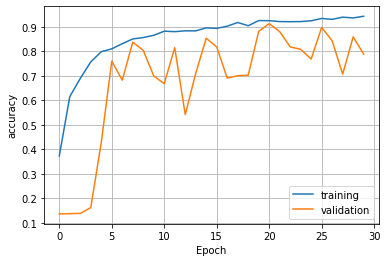

In [62]:
# Accuracy vs Epochs
plot_accuracy(history)

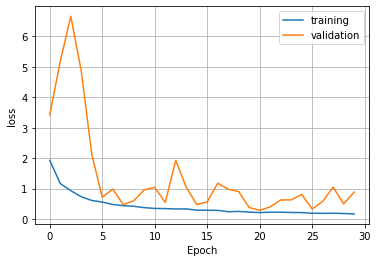

In [63]:
# Loss vs Epochs
plot_loss(history)

In [64]:
# Scores achieved for the model # achieved at epoch
best_epoch = pd.DataFrame(history.history['val_accuracy']).idxmax().values
validation_accuracy = pd.DataFrame(history.history['val_accuracy']).iloc[best_epoch,0]
Train_accuracy = pd.DataFrame(history.history['accuracy']).iloc[best_epoch,0]
validation_loss = pd.DataFrame(history.history['val_loss']).iloc[best_epoch,0]
Train_loss = pd.DataFrame(history.history['loss']).iloc[best_epoch,0]
print('Training Accuracy: %.2f and loss: %.2f' %(Train_accuracy*100, Train_loss)  )
print('Validation Accuracy: %.2f and loss :%.2f' %(validation_accuracy*100, validation_loss))
#loss,accuracy  = model.evaluate(X_test, y_test, verbose=False)
#print('Model accuracy : %.2f and loss :%.2f' %(accuracy*100, loss))

Training Accuracy: 92.50 and loss: 0.21
Validation Accuracy: 91.27 and loss :0.28


* With the results and computational resources utilized by the model, we have better model with CNN for the image classification compared to Supervised Model or simple NNL model.
* We have best training accuracy as 94.3% and validation accuracy as 93%.



### 4. Pickle the best performing model.

* The best model is being picked using checkpoint and saved in the directory as plant_classifier.h5

### 5. Import the the image in the “ Prediction” folder to predict the class. Display the image. Use the best trained image classifier model to predict the class.

In [66]:
#loading the best model we pickled
from keras.models import load_model
best_model = load_model('plant_classifier_cnn.h5')

In [67]:
best_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
batch_normalization_26 (Batc (None, 74, 74, 64)        256       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
batch_normalization_27 (Batc (None, 36, 36, 64)        256       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)      

In [68]:
best_model.load_weights

<bound method Model.load_weights of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f7dfd402090>>

In [69]:
best_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [70]:
#We have information of test images samples in sample_submission.csv
test_samples = pd.read_csv("sample_submission.csv")
test_samples.sample(2)

,file,species
194,3eebd36c6.png,Sugar beet
30,0911d3dee.png,Sugar beet


In [71]:
test_samples.shape[0] # Checking the number of test images present

794

In [72]:
imgA = cv2.imread('/gdrive/MyDrive/Colab Notebooks/CNN Project/test/3eebd36c6.png')
imgB = cv2.imread('/gdrive/MyDrive/Colab Notebooks/CNN Project/test/0911d3dee.png')

Text(0.5, 1.0, 'Sugar beet')

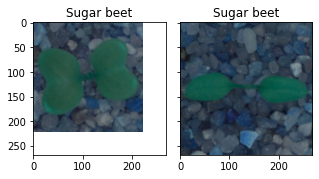

In [73]:
#Visualize the test sample data
figsize=(5,5)
fig = plt.figure(None, figsize,frameon=False)
grid = ImageGrid(fig,111,nrows_ncols=(1, 2),axes_pad=0.2,share_all=True,)
ax = grid[0]
ax.imshow(imgA,cmap='Greys_r')
ax.set_title("Sugar beet")
ax = grid[1]
ax.imshow(imgB,cmap='Greys_r')
ax.set_title("Sugar beet")


In [74]:
#Capturing the label indices and their actual name
labels = (traingen.class_indices)
labels = dict((v,k) for k,v in labels.items())
labels[7]
#predictions = [labels[k] for k in predicted_class_indices]

'Maize'

In [76]:
image = tf.keras.preprocessing.image.load_img('/gdrive/MyDrive/Colab Notebooks/CNN Project/test/3eebd36c6.png',target_size=(150,150))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = best_model.predict(input_arr)
print("The test image A is been predicted as :", labels[np.argmax(predictions)])

image = tf.keras.preprocessing.image.load_img('/gdrive/MyDrive/Colab Notebooks/CNN Project/test/0911d3dee.png',target_size=(150,150))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = best_model.predict(input_arr)
print("The test image B is been predicted as :", labels[np.argmax(predictions)])


The test image A is been predicted as : Scentless Mayweed
The test image B is been predicted as : Maize


In [77]:
def predict(path):
  image = tf.keras.preprocessing.image.load_img(path,target_size=(150,150))
  input_arr = tf.keras.preprocessing.image.img_to_array(image)
  input_arr = np.array([input_arr])  # Convert single image to a batch.
  predictions = best_model.predict(input_arr)
  lbl = labels[np.argmax(predictions)]
  return lbl


In [81]:
test_samples["PredictedLabel"] =test_samples["species"]
test_samples.head(5)

,file,species,PredictedLabel
0,0021e90e4.png,Sugar beet,Sugar beet
1,003d61042.png,Sugar beet,Sugar beet
2,007b3da8b.png,Sugar beet,Sugar beet
3,0086a6340.png,Sugar beet,Sugar beet
4,00c47e980.png,Sugar beet,Sugar beet


In [82]:
for i in range(794):
  imagename = test_samples.iloc[i,0]
  impath = "/gdrive/MyDrive/Colab Notebooks/CNN Project/test/" + imagename
  predicted = predict(impath)
  test_samples.iloc[i,2] = predicted


In [83]:
#saving the predictions in the csv file
test_samples.to_csv("predicted.csv", index=False)

In [86]:
test_samples['PredictedLabel'].value_counts() 

Scentless Mayweed    625
Maize                154
Loose Silky-bent      15
Name: PredictedLabel, dtype: int64

The model predicts the test samples in to three types - Scentless Mayweed, Maize, Loose Silky-bent

### Task2: Explain in depth why CNN out performs neural networks which in turn out perform supervised learning models when it comes to image classification. 

Use of Supervised learning for image classification which is rich in information faces the problem of curse of dimensionality. This basically means that the error increases with the increase in the number of features. It refers to the fact that algorithms are harder to design in high dimensions and often have a running time exponential in the dimension.

Same goes for neural network as well. Given a dataset of gray scale images with the standardized size of 32×32 pixels each, a traditional feedforward neural network would require 1024 input weights (plus one bias). This is fair enough, but the flattening of the image matrix of pixels to a long vector of pixel values loses all of the spatial structure in the image. Unless all of the images are perfectly resized, the neural network will have great difficulty with the problem.

Convolutional Neural Networks on the other hand expect and preserve the spatial relationship between pixels by learning internal feature representations using small squares of input data. This preprocessing is done using convolution which when done in heirarchial layers. These layers help in reducing the feature matrix without losing the vital information and successfully captures the Spatial and Temporal dependencies in an image through the application of relevant filters. The initial such layers learns generic features and later layers learns specific features. Feature are learned and used across the whole image, allowing for the objects in the images to be shifted or translated in the scene and still detectable by the network.

The CNN also has the pooling layer which is responsible for reducing the spatial size of the Convolved Feature. This is to decrease the computational power required to process the data through dimensionality reduction. When used MaxPooling it helps as Noise Suppressant as well thus maintaining the process of effectively training of the model.

In above exercise we observed the computational efficiency observed when using CNN  in our above example. This is this reason why the network is so useful for object recognition in photographs, picking out digits, faces, objects and so on with varying orientation.

In summary, below are some benefits of using convolutional neural networks:
* Number of parameters (weights) to be learnt is less than a fully connected network.
* CNN model design are invariant to object position and distortion in the scene.
* CNN model automatically learn and generalize features from the input domain.


### Task3: Help to build the image dataset to be used by the AI team to build an image classifier data. Import and display the images in python against their labels. Comment on the challenges faced during this task.

In [87]:
from zipfile import ZipFile
with ZipFile('/gdrive/MyDrive/Colab Notebooks/CNN Project/Dataset - Images.zip','r') as z:
  z.extractall()

In [88]:
ls -ltr \Images

total 1297
-rw------- 1 root root 115953 Mar 28 08:27 00007.jpg
-rw------- 1 root root  53760 Mar 28 08:27 00006.jpg
-rw------- 1 root root  79577 Mar 28 08:27 00015.jpg
-rw------- 1 root root  28304 Mar 28 08:27 00012.jpg
-rw------- 1 root root 284531 Mar 28 08:27 00009.jpg
-rw------- 1 root root  93673 Mar 28 08:27 00004.jpg
-rw------- 1 root root  75009 Mar 28 08:27 00003.jpg
-rw------- 1 root root  48863 Mar 28 08:27 00014.jpg
-rw------- 1 root root  51668 Mar 28 08:27 00013.jpg
-rw------- 1 root root  72939 Mar 28 08:27 00010.jpg
-rw------- 1 root root 257088 Mar 28 08:27 00002.jpg
-rw------- 1 root root  40865 Mar 28 08:27 00011.jpg
-rw------- 1 root root  84325 Mar 28 08:27 00008.jpg
-rw------- 1 root root   3453 Mar 28 08:27 00005.jpg
-rw------- 1 root root  35006 Mar 28 08:27 00001.jpg


In [89]:
list = os.listdir("/gdrive/MyDrive/Colab Notebooks/CNN Project/Images/") # dir is your directory path
number_files = len(list)
print("Number of Imgaes:" , number_files)

Number of Imgaes: 15


In [90]:
x = next(os.walk('/gdrive/MyDrive/Colab Notebooks/CNN Project/Images/'))[2]
x[2]

'00015.jpg'

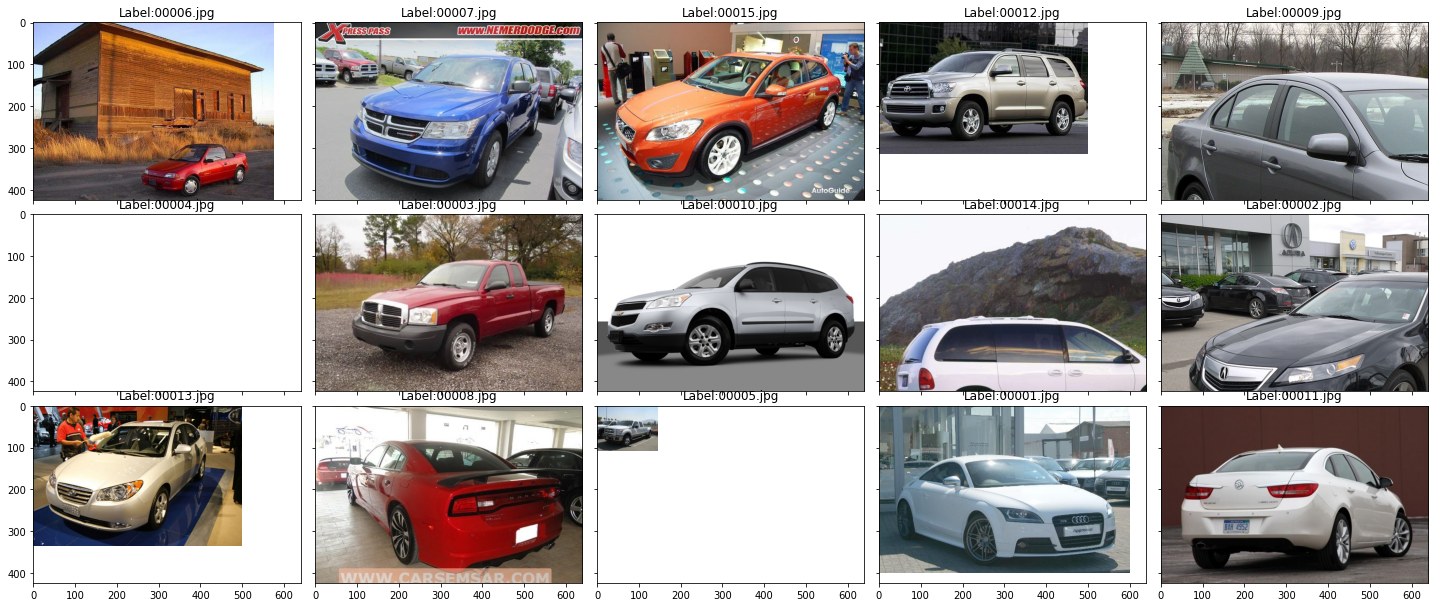

In [91]:
nrows=3
ncols=5
figsize=(25,30)
fig = plt.figure(None, figsize,frameon=False)
grid = ImageGrid(fig,111,nrows_ncols=(nrows, ncols),axes_pad=0.2,share_all=True,)
for i in range(15):
  ax = grid[i]
  file_path = "/gdrive/MyDrive/Colab Notebooks/CNN Project/Images/" + x[i]
  img = cv2.imread(file_path)
  img_cvt=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  ax.imshow(img_cvt)
  #ax.imshow(img_cvt,cmap='Greys_r')
  #ax.imshow(x[i],cmap='Greys_r')
  lbl = "Label:"+ str(x[i])
  ax.set_title(lbl)

* Here i have used cv2.cvtColor function BGR2RGB while reading the image array and display the same.

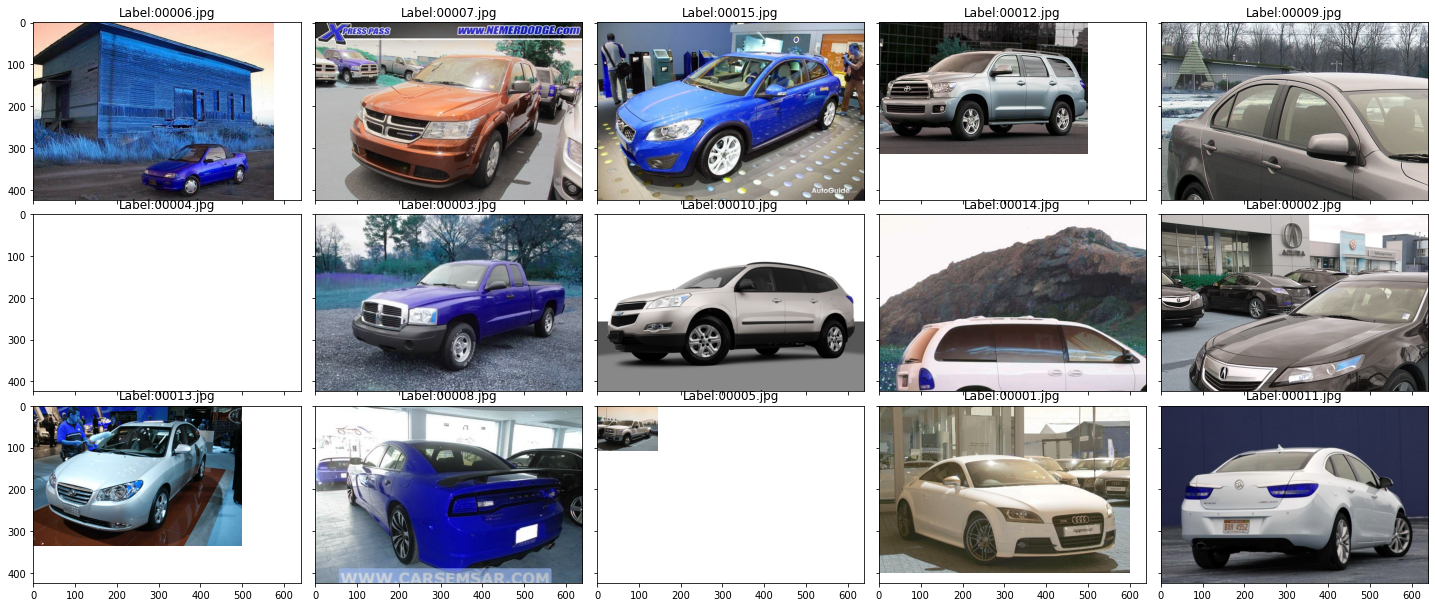

In [92]:
nrows=3
ncols=5
figsize=(25,30)
fig = plt.figure(None, figsize,frameon=False)
grid = ImageGrid(fig,111,nrows_ncols=(nrows, ncols),axes_pad=0.2,share_all=True,)
for i in range(15):
  ax = grid[i]
  file_path = "/gdrive/MyDrive/Colab Notebooks/CNN Project/Images/" + x[i]
  img = cv2.imread(file_path)
  #img_cvt=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  ax.imshow(img)
  #ax.imshow(x[i],cmap='Greys_r')
  lbl = "Label:"+ str(x[i])
  ax.set_title(lbl)

* Here i have not used cv2.cvtColor function while reading the image array and display the same. The color information is lost in most of the images like we see in '00008.jpg', '00006.jpg', '00015.jpg', '00007.jpg'. The original color information is lost.
* Also images '00004.jpg' is not displayed and '00005.jpg' is not clear as original image size seems small.

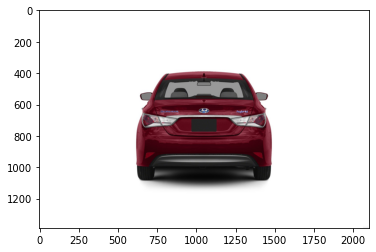

In [93]:
img = cv2.imread("/gdrive/MyDrive/Colab Notebooks/CNN Project/Images/00004.jpg")
img_cvt=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_cvt)
plt.show()

* This image is rich image with less noice due to white backgorund and Car is distinctly identified

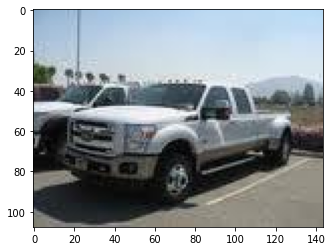

In [94]:
img = cv2.imread("/gdrive/MyDrive/Colab Notebooks/CNN Project/Images/00005.jpg")
img_cvt=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_cvt)
plt.show()

* This image is poor quality image with high blur noice. The boundaries of the vehicle will not be able to clearly identified by the algorithm.

In [95]:
ndf = pd.DataFrame( index=['filename','ImageSize','ImageType'])
for j in range(0,15,1):
  file_path = "/gdrive/MyDrive/Colab Notebooks/CNN Project/Images/" + x[j]
  img = cv2.imread(file_path)
  ndf = ndf.append({'filename': x[j],'ImageSize': img.shape,'ImageType' : type(img.shape)}, ignore_index = True)
ndf[3:18]

,ImageSize,ImageType,filename
3,"(431, 575, 3)",<class 'tuple'>,00006.jpg
4,"(480, 640, 3)",<class 'tuple'>,00007.jpg
5,"(424, 640, 3)",<class 'tuple'>,00015.jpg
6,"(315, 500, 3)",<class 'tuple'>,00012.jpg
7,"(843, 1280, 3)",<class 'tuple'>,00009.jpg
8,"(1386, 2100, 3)",<class 'tuple'>,00004.jpg
9,"(480, 640, 3)",<class 'tuple'>,00003.jpg
10,"(480, 640, 3)",<class 'tuple'>,00010.jpg
11,"(600, 800, 3)",<class 'tuple'>,00014.jpg
12,"(675, 900, 3)",<class 'tuple'>,00002.jpg


The image file are stored in the form of arrays with value from 0 to 255 for each channel. RGB stands for Red Green Blue. Most often, an RGB color is stored in a structure or unsigned integer with Blue occupying the least significant "area" (a byte in 32-bit and 24-bit formats), Green the second least, and Red the third least. BGR is the same, except the order of areas is reversed. Red occupies the least significant area, Green the second (still), and Blue the third.


In above exercise we used OpenCV python library to read the image array and display.
* OpenCV by default reads the color channel information to be stored as BGR while the jpg format image files stores as RGB. Hence we observed that the images where displayed with their original color when the library function cv2.cvtColor(img, cv2.COLOR_BGR2RGB) was used while reading the image data structure.
* Secondly we see the image shape tells about the richness of the information with less noice and distinctly identifiable boundaries of the object. The rich image '00004.jpg' had large image shape (1386, 2100, 3) while image '00005.jpg' had low image shape (108, 144, 3).

## THANK YOU